# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [517]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
import pickle
from sklearn.preprocessing import OneHotEncoder

In [518]:
random.seed(42)
np.random.RandomState = 42

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

Для того, чтобы у нас были воспроизводимые результаты. То есть, можно было бы получить их еще раз.

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [519]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [520]:
randoms_for_sample = random.sample(range(0, len(df_train)), 10)
df_train.take(randoms_for_sample)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5238,Ford Freestyle Trend Diesel BSIV,2018,675000,60000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
912,Mercedes-Benz E-Class E250 CDI Avantgarde,2016,2900000,31000,Diesel,Dealer,Automatic,First Owner,13.0 kmpl,2143 CC,204 bhp,500Nm@ 1600-1800rpm,5.0
204,Hyundai Creta 1.6 CRDi SX Plus Dual Tone,2017,1100000,37000,Diesel,Individual,Manual,First Owner,19.67 kmpl,1582 CC,126.2 bhp,259.9Nm@ 1900-2750rpm,5.0
6074,Toyota Innova 2.5 E Diesel MS 8-seater,2007,409999,248119,Diesel,Individual,Manual,Fourth & Above Owner,12.8 kmpl,2494 CC,102 bhp,20.4@ 1400-3400(kgm@ rpm),8.0
2253,Maruti Wagon R LXI CNG,2011,200000,137000,CNG,Individual,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,77Nm@ 3500rpm,5.0
2006,Maruti Wagon R LXI BS IV,2016,350000,70000,Petrol,Individual,Manual,First Owner,20.51 kmpl,998 CC,67.04 bhp,90Nm@ 3500rpm,5.0
1828,Maruti Swift Dzire LDi,2010,215000,120000,Diesel,Individual,Manual,Third Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
1143,Maruti Celerio VDi,2015,250000,100000,Diesel,Individual,Manual,Second Owner,27.62 kmpl,793 CC,47 bhp,125Nm@ 2000rpm,5.0
6033,Hyundai i20 Sportz 1.2,2013,315000,49000,Petrol,Individual,Manual,Second Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
839,Maruti Wagon R VXI BS IV,2011,200000,94000,Petrol,Individual,Manual,Third Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [521]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [522]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [523]:
df_test.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [524]:
df_train.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [525]:
#Где не 0, там и пропуски
df_train.isna().mean()*100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.886127
engine           2.886127
max_power        2.800400
torque           2.900414
seats            2.886127
dtype: float64

In [526]:
df_test.isna().mean()*100

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
mileage          1.9
engine           1.9
max_power        1.9
torque           1.9
seats            1.9
dtype: float64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [527]:
df_train.drop('selling_price', axis=1).duplicated().value_counts()

False    5840
True     1159
dtype: int64

(0.15 балла) <font color='#9933CC'>Отобразите повторяющиеся автомобили</font>

In [528]:
df_train[df_train.drop('selling_price', axis=1).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то первую строку по этому автомобилю

In [529]:
a = list(df_train.columns)
a.remove('selling_price')
df_train.drop_duplicates(subset=a, keep='first', inplace=True)
del a

In [530]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [531]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [532]:
to_clean = ['mileage', 'engine', 'max_power']

for i in to_clean:
    df_train[i] = df_train[i].str.extract(r'(\d)')
    df_test[i] = df_test[i].str.extract(r'(\d)')
    df_train[i] = df_train[i].astype('float64')
    df_test[i] = df_test[i].astype('float64')
    
df_train.drop(labels='torque', axis=1, inplace=True)
df_test.drop(labels='torque', axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [533]:
df_train = df_train.fillna(df_train.median())
df_test = df_test.fillna(df_train.median())


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

Логически нет прямой зависимости между тем, сколько мест в машине, и хуже она или лучше. Ведь мы не может сказать, что в целом маршрутка лучше, чем кабриолет

In [534]:
to_clean = ['engine', 'seats']

for i in to_clean:
    df_train[i] = df_train[i].astype('int')
    df_test[i] = df_test[i].astype('int')

In [337]:
#Я сохранял данные в другом порядке, не в котором идет код. Это нужно мне для того, чтобы аплоуд файл в фастапи
#nans = df_train.drop(labels='selling_price', axis=1)
#nans = "../fill_nan.csv"
#df_test.to_csv(nans)  

In [338]:
#for_fastapi = df_test.drop(labels='selling_price', axis=1)
#my_csv = "../my_csv.csv"
#for_fastapi.to_csv(my_csv)  

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

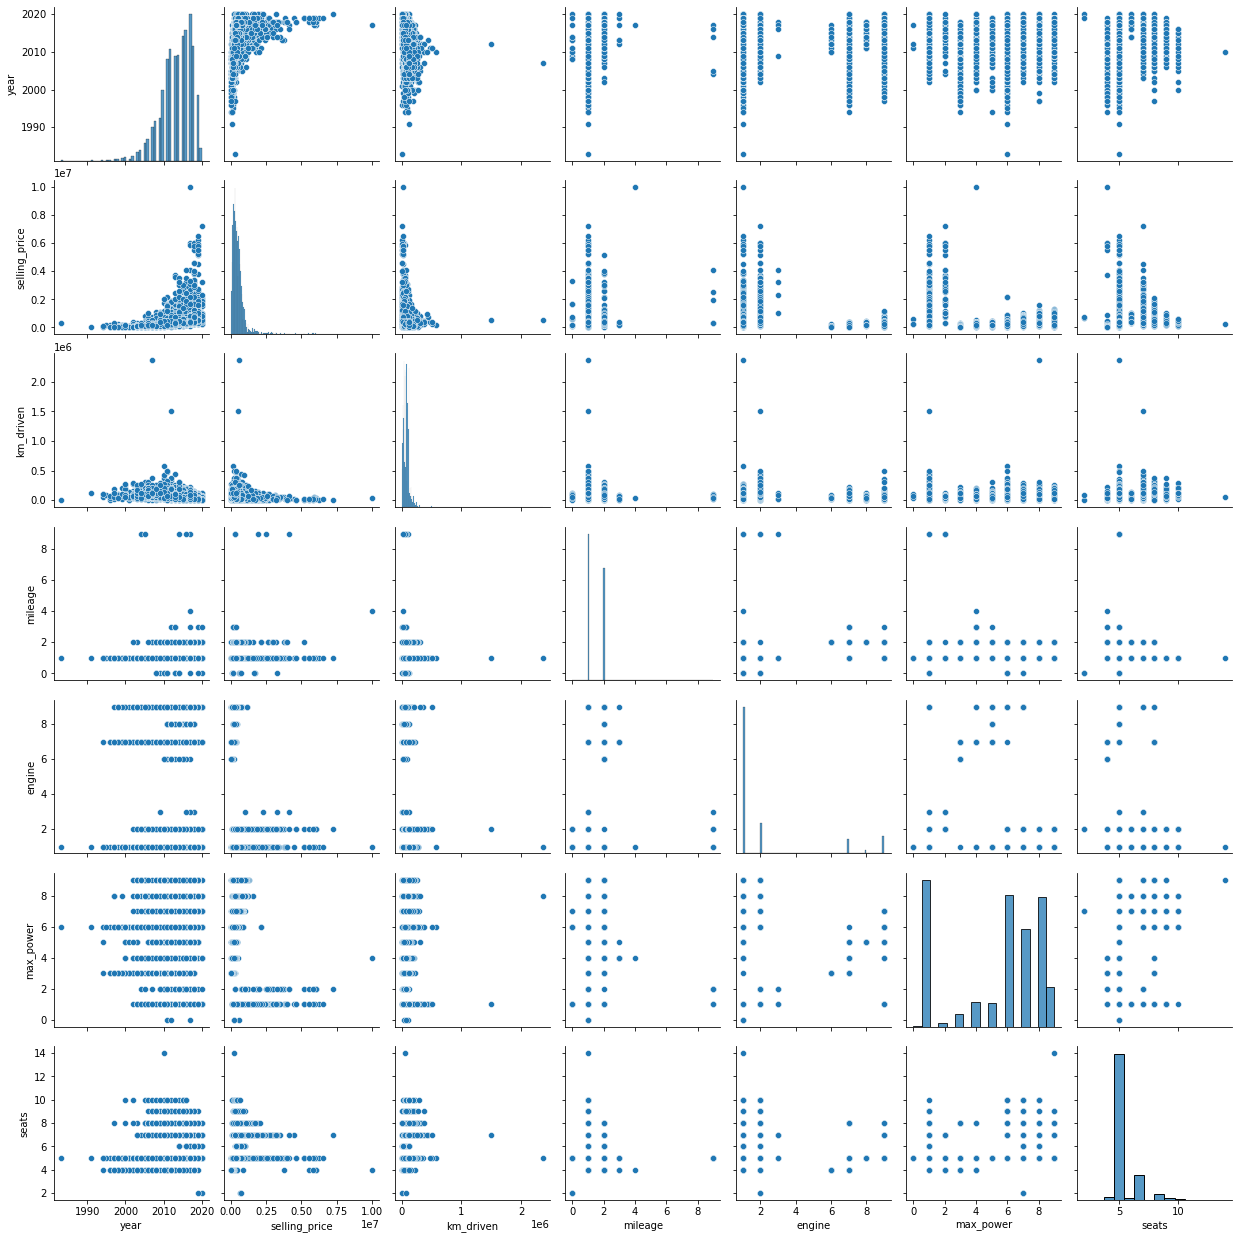

In [448]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Видно, что больше дорогих новых машин. Дорогие машины в основном без пробега.  А корреляции лучше комментировать по хитмапе :)

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

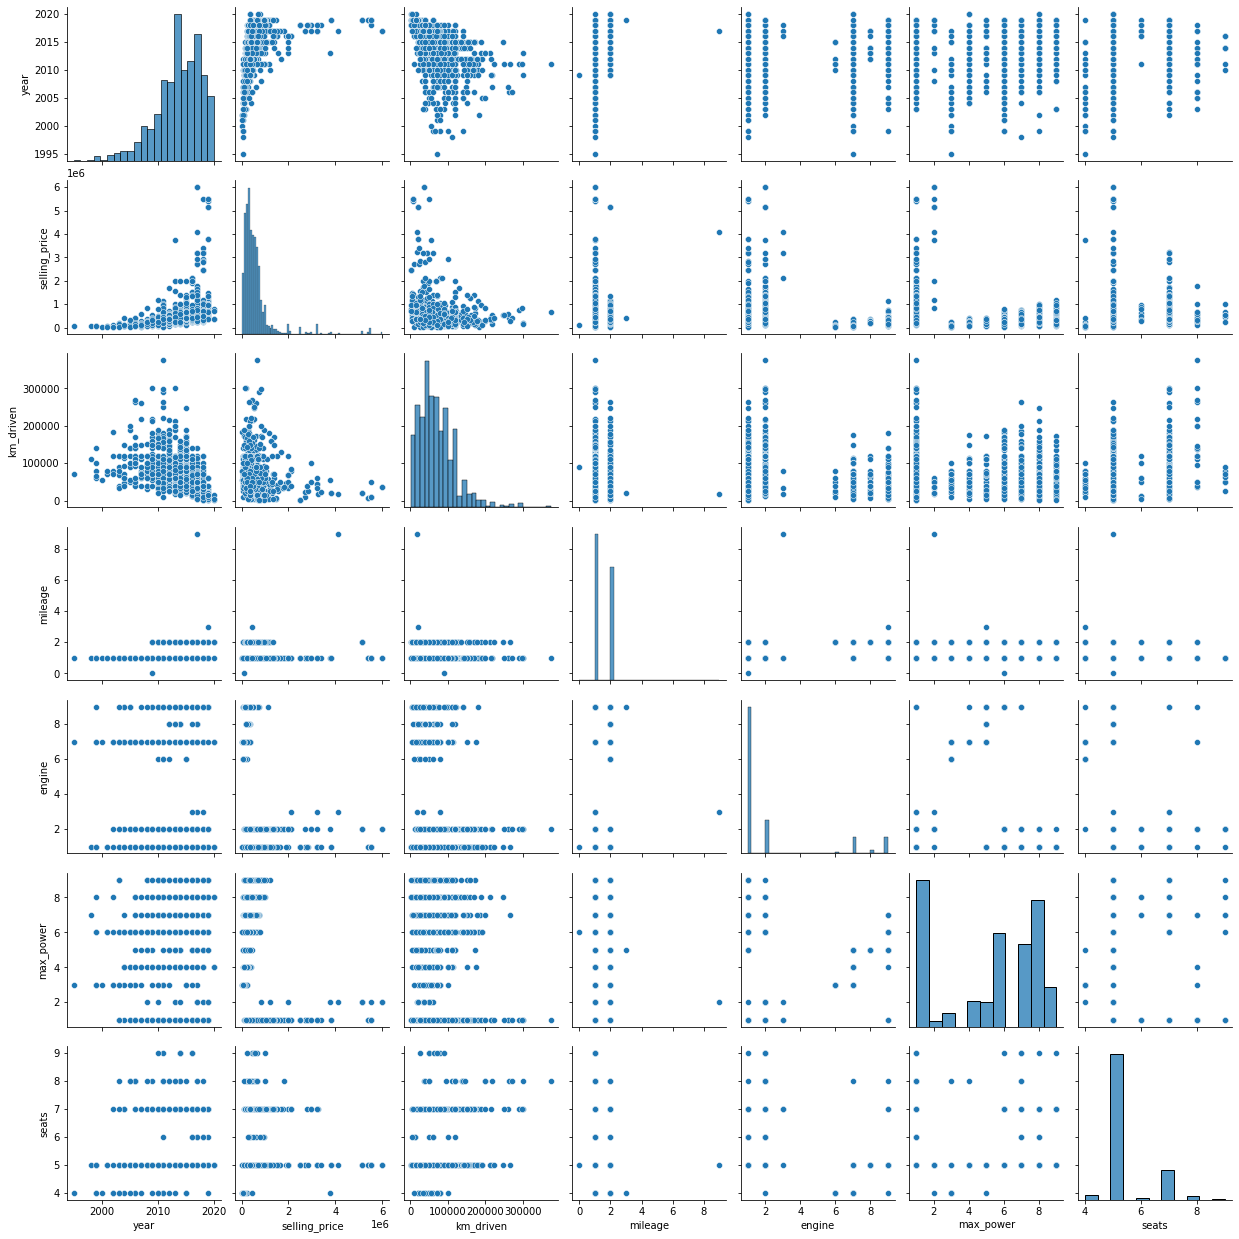

In [370]:
sns.pairplot(df_test)

Да, различаются. В тесте больше машин с пробегом, также график selling_price x year выглядит иначе

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [371]:
a = df_train.select_dtypes(include='number')

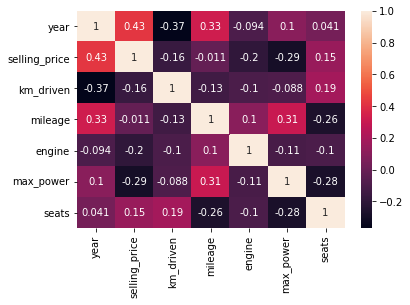

In [372]:
sns.heatmap(a.corr(), annot=True)
del a

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

1) Selling price x mileage (-0.011); year x seats(0.041)

2) Зависимость, конечно, недостаточно сильная для удаления. Но есть связь между selling price x year (0.43)

3) Мы видим отрицательную связь между годом и км. Это значит, что между ними есть связь, но мы не можем утверждать, что это 100% казуация

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

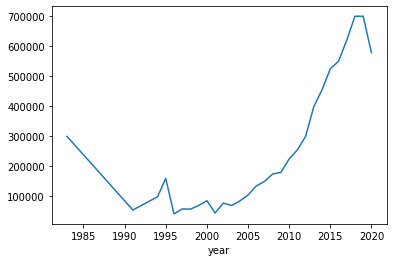

In [374]:
a = df_train.groupby('year')['selling_price'].agg('median')
a.plot()
del a

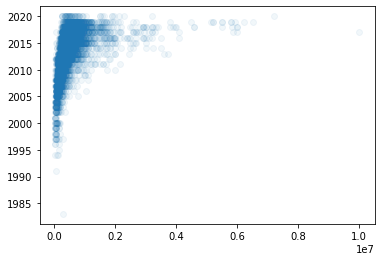

In [375]:
plt.plot(df_train['selling_price'], df_train['year'], 'o', alpha=0.06)

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<AxesSubplot:>

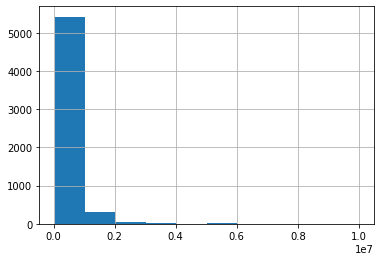

In [535]:
df_train['selling_price'].hist()

<AxesSubplot:>

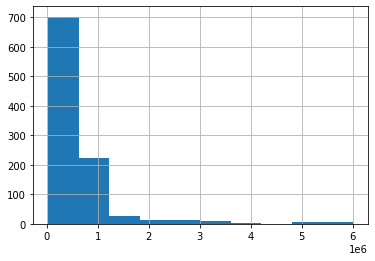

In [536]:
df_test['selling_price'].hist()

<AxesSubplot:title={'center':'selling_price'}, xlabel='seats'>

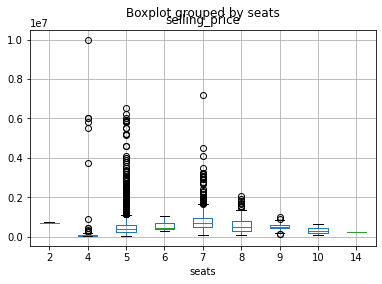

In [537]:
df_train.boxplot(by ='seats', column =['selling_price'], grid = True)

Мне было интересно посмотреть, какое распределение цены на тесте. В целом заметно, что сильно уходят хвосты вправо. Также похоже, что у нас много выбросов в данных. Займемся этим позже

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [538]:
y_train = df_train['selling_price']
y_test = df_test['selling_price']
X_train = (df_train.select_dtypes(include='number')).drop('selling_price', axis=1)
X_test = (df_test.select_dtypes(include='number')).drop('selling_price', axis=1)

In [539]:
assert X_train.shape == (5840, 6)

In [540]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [342]:
def show_metrics(model, true_train, true_test, x_train, x_test):
    print(f'R2 for train {r2_score(true_train, model.predict(x_train))}')
    print(f'MSE for train {MSE(true_train, model.predict(x_train))}')
    print(f'R2 for test {r2_score(true_test, model.predict(x_test))}')
    print(f'MSE for test {MSE(true_test, model.predict(x_test))}')

In [343]:
LR = LinearRegression()
LR.fit(X_train, y_train)
show_metrics(LR, y_train, y_test, X_train, X_test)

R2 for train 0.3394286599730215
MSE for train 189345071272.17557
R2 for test 0.31628824642291353
MSE for test 393017039781.7446


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [344]:
column_names = X_train.columns.values
scaler = StandardScaler()

scaler.fit(X_train)
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = column_names)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = column_names)

In [345]:
LR = LinearRegression()
LR.fit(X_train, y_train)
show_metrics(LR, y_train, y_test, X_train, X_test)

R2 for train 0.3394286599730201
MSE for train 189345071272.176
R2 for test 0.316288246422907
MSE for test 393017039781.74835


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [351]:
X_train.columns
print(X_train.columns.values, LR.coef_)

['year' 'km_driven' 'mileage' 'engine' 'max_power' 'seats'] [ 230555.01514094  -34555.62312533  -15588.03876205 -104506.25393679
 -187769.95885147   11079.3972588 ]


Получается, что год, но это явно не очень хорошая модель, чтобы ее действительно интерпретировать

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [352]:
from sklearn.linear_model import Lasso
las = Lasso()

las.fit(X_train, y_train)

show_metrics(las, y_train, y_test, X_train, X_test)

R2 for train 0.339428659954494
MSE for train 189345071277.4863
R2 for test 0.3162873024206466
MSE for test 393017582421.2042


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

Автоматически не занулила. Но если ставить очень высокие коэфы, то занулит.

In [353]:
print(las.coef_)

[ 230554.12907149  -34554.53805266  -15587.10956335 -104505.29496461
 -187769.11657549   11078.7983534 ]


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится фукнция [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [354]:
from sklearn.model_selection import GridSearchCV
las = Lasso()
hyper = {'alpha':np.linspace(0.001, 20000, 10000)}
clf = GridSearchCV(las, hyper, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 2.00119992e+00, 4.00139984e+00, ...,
       1.99959996e+04, 1.99979998e+04, 2.00000000e+04])})

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Десять тысяч раз по 10

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [355]:
print(clf.best_params_)
#{'alpha': 17955.795681768177}

{'alpha': 17955.795681768177}


In [356]:
las = Lasso(alpha = 17955.79)
las.fit(X_train, y_train)
show_metrics(las, y_train, y_test, X_train, X_test)

R2 for train 0.33355351380433473
MSE for train 191029113407.57767
R2 for test 0.2966279871322638
MSE for test 404318318233.2661


In [357]:
print(las.coef_)

[ 2.15178867e+05 -1.49361979e+04 -0.00000000e+00 -8.70820506e+04
 -1.72403838e+05  7.57176273e+01]


Да, с введением огромной альфы у нас действительно занулились некоторые параметры. Тем не менее, нам это не помогло, стало только хуже качество на тесте

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [361]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
elastic.fit(X_train, y_train)
show_metrics(elastic, y_train, y_test, X_train, X_test)

R2 for train 0.3002006327807766
MSE for train 200589327803.61865
R2 for test 0.24191493996285107
MSE for test 435768940112.2377


In [362]:
elastic = ElasticNet()
hyper = { "alpha": np.linspace(0.001, 1000, 1000),
        "l1_ratio": np.arange(0.01, 1.0, 0.1)}
clf = GridSearchCV(elastic, hyper, cv=10, scoring='r2')
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000e-03, 1.00200e+00, 2.00300e+00, 3.00400e+00, 4.00500e+00,
       5.00600e+00, 6.00700e+00, 7.00800e+00, 8.00900e+00, 9.01000e+00,
       1.00110e+01, 1.10120e+01, 1.20130e+01, 1.30140e+01, 1.40150e+01,
       1.50160e+01, 1.60170e+01, 1.70180e+01, 1.80190e+01, 1.90200e+01,
       2.00210e+01, 2.10220e+01, 2.20230e+01, 2.302...
       9.75976e+02, 9.76977e+02, 9.77978e+02, 9.78979e+02, 9.79980e+02,
       9.80981e+02, 9.81982e+02, 9.82983e+02, 9.83984e+02, 9.84985e+02,
       9.85986e+02, 9.86987e+02, 9.87988e+02, 9.88989e+02, 9.89990e+02,
       9.90991e+02, 9.91992e+02, 9.92993e+02, 9.93994e+02, 9.94995e+02,
       9.95996e+02, 9.96997e+02, 9.97998e+02, 9.98999e+02, 1.00000e+03]),
                         'l1_ratio': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])},
             scoring='r2')

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [363]:
print(clf.best_params_)
#{'alpha': 1.002, 'l1_ratio': 0.91}

{'alpha': 1.002, 'l1_ratio': 0.91}


In [364]:
elastic = ElasticNet(alpha=1.002, l1_ratio=0.91)
elastic.fit(X_train, y_train)
show_metrics(elastic, y_train, y_test, X_train, X_test)

R2 for train 0.33674651176329273
MSE for train 190113877778.24182
R2 for test 0.30106960441066133
MSE for test 401765149788.42615


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [628]:
from sklearn.compose import make_column_transformer

In [629]:
X_train_cat = df_train.copy()
X_test_cat = df_test.copy()
X_train_cat.drop(['selling_price', 'name'], axis=1, inplace=True)
X_test_cat.drop(['selling_price', 'name'],  axis=1, inplace=True)

In [630]:
scaler = StandardScaler()
num_d = X_train_cat.select_dtypes(exclude=['object'])
scaler.fit(X_train_cat[num_d.columns])

X_train_cat[num_d.columns] = pd.DataFrame(data = scaler.transform(X_train_cat[num_d.columns]), columns = num_d.columns)
X_test_cat[num_d.columns] = pd.DataFrame(data = scaler.transform(X_test_cat[num_d.columns]), columns = num_d.columns)

X_test_cat2 = X_test_cat.copy()
X_train_cat2 =  X_train_cat.copy()

In [631]:
assert X_train_cat.shape == (5840, 10)

(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [544]:
cat_cols = (X_train_cat.select_dtypes(include=['object']).columns.values).copy()

In [545]:
encoder = OneHotEncoder(drop=None)

encoder_df = pd.DataFrame(encoder.fit_transform(X_train_cat[cat_cols]).toarray())
encoder_df_2 = pd.DataFrame(encoder.transform(X_test_cat[cat_cols]).toarray())

X_train_cat = X_train_cat.join(encoder_df)
X_test_cat = X_test_cat.join(encoder_df_2)

X_train_cat.drop(cat_cols, axis=1, inplace=True)
X_test_cat.drop(cat_cols, axis=1, inplace=True)

In [546]:
X_train_cat.rename(columns = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8',
                             9:'9', 10:'10', 11:'11', 12:'12', 13:'13'}, inplace = True)
X_test_cat.rename(columns = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8',
                             9:'9', 10:'10', 11:'11', 12:'12', 13:'13'}, inplace = True)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [547]:
ridge =Ridge()
ridge.fit(X_train_cat, y_train)
show_metrics(ridge, y_train, y_test, X_train_cat, X_test_cat)

R2 for train 0.5066512412031224
MSE for train 141412668452.46277
R2 for test 0.4825207236985465
MSE for test 297461864969.192


In [549]:
hyper = { "alpha": np.linspace(0.001, 1000, 1000)}
clf = GridSearchCV(ridge, hyper, cv=10, scoring='r2')
clf.fit(X_train_cat, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000e-03, 1.00200e+00, 2.00300e+00, 3.00400e+00, 4.00500e+00,
       5.00600e+00, 6.00700e+00, 7.00800e+00, 8.00900e+00, 9.01000e+00,
       1.00110e+01, 1.10120e+01, 1.20130e+01, 1.30140e+01, 1.40150e+01,
       1.50160e+01, 1.60170e+01, 1.70180e+01, 1.80190e+01, 1.90200e+01,
       2.00210e+01, 2.10220e+01, 2.20230e+01, 2.30240e+0...
       9.70971e+02, 9.71972e+02, 9.72973e+02, 9.73974e+02, 9.74975e+02,
       9.75976e+02, 9.76977e+02, 9.77978e+02, 9.78979e+02, 9.79980e+02,
       9.80981e+02, 9.81982e+02, 9.82983e+02, 9.83984e+02, 9.84985e+02,
       9.85986e+02, 9.86987e+02, 9.87988e+02, 9.88989e+02, 9.89990e+02,
       9.90991e+02, 9.91992e+02, 9.92993e+02, 9.93994e+02, 9.94995e+02,
       9.95996e+02, 9.96997e+02, 9.97998e+02, 9.98999e+02, 1.00000e+03])},
             scoring='r2')

In [552]:
print(clf.best_params_)
#{'alpha': 152.15300000000002}

{'alpha': 152.15300000000002}


In [553]:
ridge = Ridge(alpha=152.153)
ridge.fit(X_train_cat, y_train)
show_metrics(ridge, y_train, y_test, X_train_cat, X_test_cat)

R2 for train 0.4766984140758169
MSE for train 149998297049.35464
R2 for test 0.4859238514459062
MSE for test 295505649961.52405


Да! После добавления категор фич жить сразу стало лучшее и веселее. А после тюнинга альфы и с переобучением поборолись немного даже

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [554]:
X_train_new, X_test_new = X_train_cat.copy(), X_test_cat.copy()

Добавим квадрат года

In [555]:
X_train_new['year_sq'] = X_train_new['year']* X_train_new['year']
X_test_new['year_sq'] = X_test_new['year']* X_test_new['year']

In [556]:
ridge =Ridge()
ridge.fit(X_train_new, y_train)
show_metrics(ridge, y_train, y_test, X_train_new, X_test_new)

R2 for train 0.5249579728390832
MSE for train 136165257315.56718
R2 for test 0.4965964425812829
MSE for test 289370739814.25586


Посчитаем лошадей/объем

In [557]:
X_train_new['power/mileage'] = X_train_new['max_power']/ X_train_new['mileage']
X_test_new['power/mileage'] = X_test_new['max_power']/X_test_new['mileage']

In [558]:
ridge =Ridge()
ridge.fit(X_train_new, y_train)
show_metrics(ridge, y_train, y_test, X_train_new, X_test_new)

R2 for train 0.5282321957082206
MSE for train 135226739512.94426
R2 for test 0.49917269835047495
MSE for test 287889834431.496


In [559]:
from scipy import stats

In [560]:
my_col = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats','year_sq', 'power/mileage', 'selling_price']
X_train_Z = X_train_new.join(y_train)
X_train_Z = X_train_Z[(np.abs(stats.zscore(X_train_Z[my_col])) < 3).all(axis=1)]
y_train_Z = X_train_Z['selling_price'].copy()
X_train_Z.drop(['selling_price'], axis=1, inplace=True)

In [561]:
ridge =Ridge()
ridge.fit(X_train_Z, y_train_Z)
show_metrics(ridge, y_train_Z, y_test, X_train_Z, X_test_new)

R2 for train 0.6654598219723493
MSE for train 35875374492.299324
R2 for test 0.37826426544866576
MSE for test 357391454280.9507


In [563]:
hyper = { "alpha": np.linspace(0.001, 2000, 1000)}
clf = GridSearchCV(ridge, hyper, cv=10, scoring='r2')
clf.fit(X_train_Z, y_train_Z)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 2.00300100e+00, 4.00500200e+00, 6.00700300e+00,
       8.00900400e+00, 1.00110050e+01, 1.20130060e+01, 1.40150070e+01,
       1.60170080e+01, 1.80190090e+01, 2.00210100e+01, 2.20230110e+01,
       2.40250120e+01, 2.60270130e+01, 2.80290140e+01, 3.00310150e+01,
       3.20330160e+01, 3.40350170e+01, 3.60370180e+01, 3...
       1.95395398e+03, 1.95595598e+03, 1.95795798e+03, 1.95995998e+03,
       1.96196198e+03, 1.96396398e+03, 1.96596598e+03, 1.96796798e+03,
       1.96996998e+03, 1.97197199e+03, 1.97397399e+03, 1.97597599e+03,
       1.97797799e+03, 1.97997999e+03, 1.98198199e+03, 1.98398399e+03,
       1.98598599e+03, 1.98798799e+03, 1.98998999e+03, 1.99199200e+03,
       1.99399400e+03, 1.99599600e+03, 1.99799800e+03, 2.00000000e+03])},
             scoring='r2')

In [565]:
print(clf.best_params_)

{'alpha': 20.021010010010013}


In [566]:
ridge = Ridge(alpha=20)
ridge.fit(X_train_Z, y_train_Z)
show_metrics(ridge, y_train_Z, y_test, X_train_Z, X_test_new)

R2 for train 0.6646577341072984
MSE for train 35961388682.59503
R2 for test 0.37610961285185385
MSE for test 358630010121.07874


Несмотря на то, что у нас стали хуже метрики качества для регрессии после того, как выбросы были убраны, бизнесовая метрика выросла!Если это то, что нужно заказчику, то даже хорошо

In [615]:
X_train_cat2['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [632]:
rating = []
for row in X_train_cat2['owner']:
    if row == 'Test Drive Car':
        rating.append(0)
    elif row == ('First Owner'):
        rating.append(1)
    elif row == (('First Owner') or ('Third Owner')):
        rating.append(2)
    else: 
        rating.append(3)
        
X_train_cat2['owner2'] = rating

rating = []
for row in X_test_cat2['owner']:
    if row == 'Test Drive Car':
        rating.append(0)
    elif row == ('First Owner'):
        rating.append(1)
    elif row == (('First Owner') or ('Third Owner')):
        rating.append(2)
    else: 
        rating.append(3)
        
X_test_cat2['owner2'] = rating

Давайте попробуем закодировать доп информацию о продавцах машин

In [633]:
encoder = OneHotEncoder(drop=None)

encoder_df = pd.DataFrame(encoder.fit_transform(X_train_cat2[cat_cols]).toarray())
encoder_df_2 = pd.DataFrame(encoder.transform(X_test_cat2[cat_cols]).toarray())

X_train_cat2 = X_train_cat2.join(encoder_df)
X_test_cat2 = X_test_cat2.join(encoder_df_2)

X_train_cat2.drop(cat_cols, axis=1, inplace=True)
X_test_cat2.drop(cat_cols, axis=1, inplace=True)

X_train_cat2.rename(columns = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8',
                             9:'9', 10:'10', 11:'11', 12:'12', 13:'13'}, inplace = True)
X_test_cat2.rename(columns = {0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8',
                             9:'9', 10:'10', 11:'11', 12:'12', 13:'13'}, inplace = True)

X_train_cat2['year_sq'] = X_train_cat2['year']* X_train_cat2['year']
X_test_cat2['year_sq'] = X_test_cat2['year']* X_test_cat2['year']

X_train_cat2['power/mileage'] = X_train_cat2['max_power']/ X_train_cat2['mileage']
X_test_cat2['power/mileage'] = X_test_cat2['max_power']/X_test_cat2['mileage']

In [634]:
ridge = Ridge()
ridge.fit(X_train_cat2, y_train)
show_metrics(ridge, y_train, y_test, X_train_cat2, X_test_cat2)

R2 for train 0.5288497790700071
MSE for train 135049716444.32431
R2 for test 0.4956798163485431
MSE for test 289897642747.682


Лучше не стало, но попытка была

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

Тюнинг сильно не помогает, будем оценивать по предобработке

In [643]:
def business_metrics(y_true, y_pred):
    score = 0
    for i in range(len(y_true)):
        diff = abs(y_pred[i] - y_true[i])
        if diff <= (y_true[i] * 0.1):
            score += 1
    return (score/len(y_true))*100 

In [644]:
ridge.fit(X_train_Z, y_train_Z)
preds = ridge.predict(X_test_new)
print(f'The business metric is {business_metrics(y_test, preds)}%')

The business metric is 18.5%


In [645]:
ridge.fit(X_train_new, y_train)
preds = ridge.predict(X_test_new)

In [646]:
print(f'The business metric is {business_metrics(y_test, preds)}%')

The business metric is 17.9%


# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [252]:
#pkl_filename = "../car.pkl"
#with open(pkl_filename, 'wb') as file:
#    pickle.dump(ridge, file)

In [253]:
#scaler_pickle = "../scaler.pkl"
#with open(scaler_pickle, 'wb') as file:
#    pickle.dump(scaler, file)

In [254]:
#encoder_pickle = "../encoder.pkl"
#with open(encoder_pickle, 'wb') as file:
#    pickle.dump(encoder, file)

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* .ipynb-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* .py-файл с реализацией сервиса
* .pickle-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* .md-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит readme.md:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали до сюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link